In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, f1_score,recall_score,classification_report
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('details.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [6]:
legal_transaction = data[data.Class == 0]
fraud_transaction = data[data.Class == 1]

In [7]:
print(legal_transaction.shape)
print(fraud_transaction.shape)
data.groupby('Class').mean()

(284315, 31)
(492, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [8]:
legal_sample = legal_transaction.sample(n=492*2)
legal_sample.shape

(984, 31)

In [9]:
new_dataset = pd.concat([legal_sample, fraud_transaction])

In [10]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
146419,87691.0,-1.879960,1.484932,-1.925873,-2.668726,0.626213,-1.274274,1.419120,-0.835885,0.756245,...,0.723952,0.569562,0.213773,0.759366,-0.043547,0.497881,0.304385,-0.230084,80.00,0
43003,41332.0,1.240703,-0.640674,0.155634,-0.842173,-0.527249,0.102999,-0.586446,0.129054,-1.169337,...,0.337393,0.879815,-0.091003,-0.237526,0.443587,-0.078167,0.018042,-0.001350,39.85,0
162288,114993.0,-3.288865,3.518396,-1.982305,0.730946,-1.675487,2.187961,0.105383,-9.471469,0.236596,...,8.127658,-2.409758,-1.365662,-0.024569,-0.185473,-0.308298,1.660371,0.140442,621.30,0
26145,33930.0,1.415238,-0.119801,-0.750777,-1.066749,0.182298,-0.609132,0.200953,-0.219615,1.363472,...,-0.118277,-0.095219,-0.359065,-0.980238,1.128098,-0.461483,0.030899,-0.004085,1.00,0
235294,148332.0,2.076791,0.470368,-2.787561,0.428636,1.031972,-0.917921,0.212948,-0.166853,0.404626,...,0.075576,0.363150,-0.179177,-1.267084,0.344664,-0.054959,0.011240,-0.013899,1.00,0


In [11]:
new_dataset['Class'].value_counts()

Class
0    984
1    492
Name: count, dtype: int64

In [12]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,91435.102642,-0.064341,-0.042735,0.027587,0.046373,0.002610,0.007936,-0.022923,-0.002829,-0.019485,...,-0.010875,0.031346,-0.035544,-0.026593,-0.001281,0.014141,0.003125,0.000999,-0.007400,96.198039
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [13]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [14]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
146419   87691.0 -1.879960  1.484932 -1.925873 -2.668726  0.626213 -1.274274   
43003    41332.0  1.240703 -0.640674  0.155634 -0.842173 -0.527249  0.102999   
162288  114993.0 -3.288865  3.518396 -1.982305  0.730946 -1.675487  2.187961   
26145    33930.0  1.415238 -0.119801 -0.750777 -1.066749  0.182298 -0.609132   
235294  148332.0  2.076791  0.470368 -2.787561  0.428636  1.031972 -0.917921   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [16]:
print(X.shape, X_train.shape, X_test.shape)

(1476, 30) (1180, 30) (296, 30)


In [17]:
model = BernoulliNB()

In [18]:
model.fit(X_train, Y_train)

BernoulliNB()

In [19]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)


In [20]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9322033898305084


In [21]:
y_pred = model.predict(X_test)
NB_test_data_accuracy = accuracy_score(Y_test,y_pred)
NB_precision = precision_score(Y_test, y_pred)
NB_f1 = f1_score(Y_test, y_pred)
NB_recall = recall_score(Y_test,y_pred)
classification_rep = classification_report(Y_test, y_pred)


In [22]:
print("Naive Bayes : ")
print("Accuracy : ",NB_test_data_accuracy)
print("Precision : ",NB_precision)
print("F1 : ",NB_f1)
print("Recall : ",NB_recall)
print(f'Classification Report:\n{classification_rep}')

Naive Bayes : 
Accuracy :  0.9459459459459459
Precision :  1.0
F1 :  0.9012345679012346
Recall :  0.8202247191011236
Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       207
           1       1.00      0.82      0.90        89

    accuracy                           0.95       296
   macro avg       0.96      0.91      0.93       296
weighted avg       0.95      0.95      0.94       296



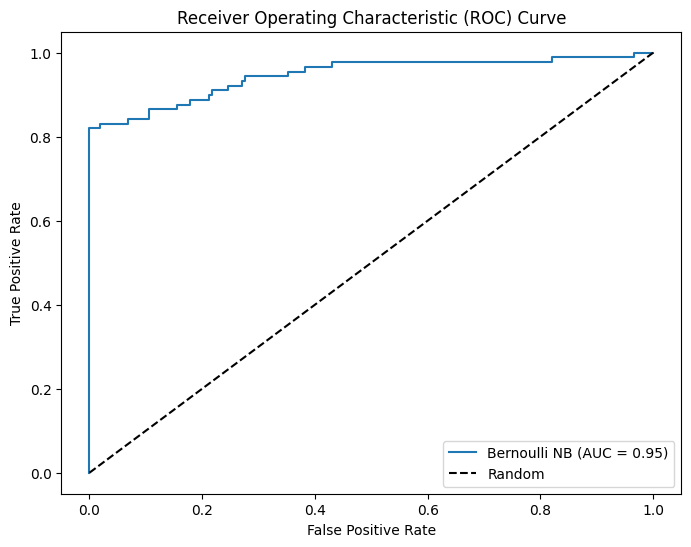

In [23]:

y_probabilities = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(Y_test, y_probabilities)
auc = roc_auc_score(Y_test, y_probabilities)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Bernoulli NB (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()